# **CNN for multi-class classification**

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = 'drive/MyDrive/Fish_Dataset'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 7200 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


### VGG16

In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=9, activation="softmax"))


### Custom CNN Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=9, activation="softmax"))


In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("my_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=train_dataset, validation_data= validation_dataset, validation_steps=20, epochs=25 , callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
100/100 [==============================] - 58s 432ms/step - loss: 1.8753 - accuracy: 0.2953 - val_loss: 0.7803 - val_accuracy: 0.6906
Epoch 2/25
100/100 [==============================] - 43s 430ms/step - loss: 0.4166 - accuracy: 0.8542 - val_loss: 0.5237 - val_accuracy: 0.7953
Epoch 3/25
100/100 [==============================] - 43s 430ms/step - loss: 0.1870 - accuracy: 0.9318 - val_loss: 0.3918 - val_accuracy: 0.8734
Epoch 4/25
100/100 [==============================] - 43s 430ms/step - loss: 0.0764 - accuracy: 0.9739 - val_loss: 0.4253 - val_accuracy: 0.8594
Epoch 5/25
100/100 [==============================] - 43s 430ms/step - loss: 0.0544 - accuracy: 0.9805 - val_loss: 0.5618 - val_accuracy: 0.8250
Epoch 6/25
100/100 [==============================] - 43s 429ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.5825 - val_accuracy: 0.8219
Epoch 7/25
100/100 [==============================] - 43s 428ms/step - loss: 0.0359 - accuracy: 0.9858 - val_loss: 0.2803 - val_ac

In [ ]:
model.save('my_model.h5')
model.save('drive/MyDrive/Models/my_model.h5')

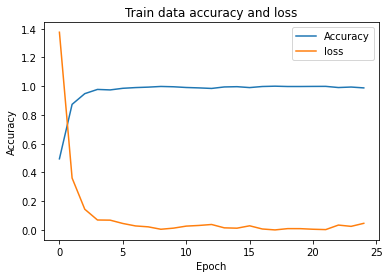

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['loss'])
plt.title("Train data accuracy and loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

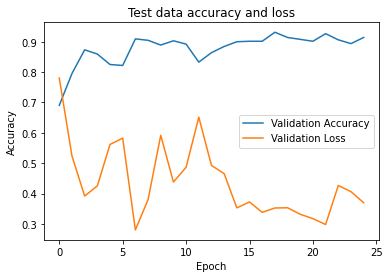

In [ ]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])
plt.title("Test data accuracy and loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Validation Accuracy","Validation Loss"])
plt.show()

Input:  Gilt-Head Bream
Prediction:  Gilt-Head-Bream


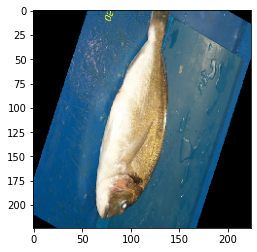

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import random as rd
i = rd.randint(0, len(validation_dataset.filenames))
path = dir + "/" + validation_dataset.filenames[i]
print("Input: ",validation_dataset.filenames[i].split('/')[0])
img = image.load_img(path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
class_names = ['Black_sea_sprat', 'Gilt-Head-Bream', 'Horse Mackrel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
saved_model = load_model("my_model.h5")
output = saved_model.predict(img)
ind = np.argmax(output[0])

print("Prediction: ", class_names[ind])


